In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

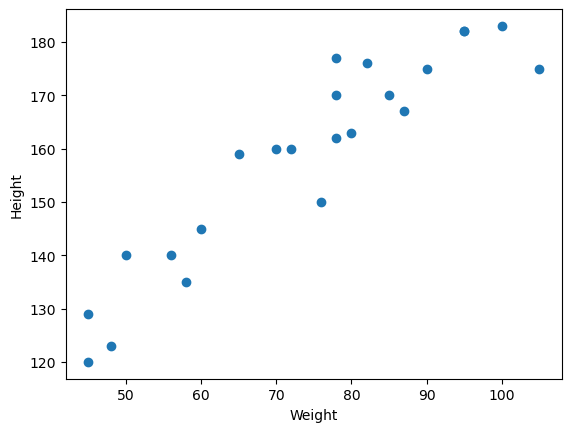

In [7]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [9]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [10]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [15]:
#divide our dataset into independent and dependent features
X = df[['Weight']]
y = df['Height']

In [16]:
X.shape

(23, 1)

In [17]:
y.shape

(23,)

In [18]:
#train-test split

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 30)
 

In [79]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((18, 1), (5, 1), (18,), (5,))

In [80]:
#Standard Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Height')

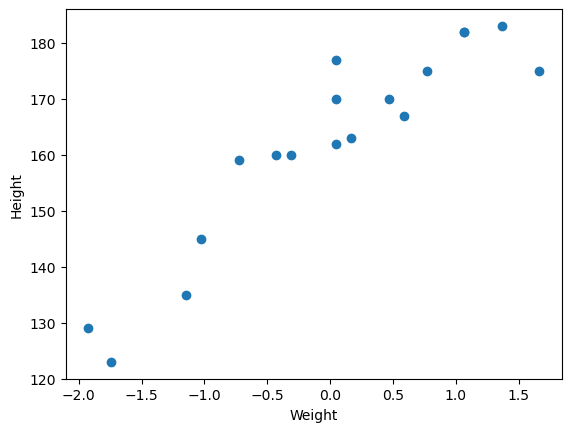

In [85]:
plt.scatter(X_train,y_train )
plt.xlabel('Weight')
plt.ylabel('Height')

In [86]:
#Train your model

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
regressor = LinearRegression()

In [89]:
#TRaing the traing data
regressor.fit(X_train,y_train)

LinearRegression()

In [90]:
regressor.coef_

array([16.35327175])

In [91]:
regressor.intercept_

162.05555555555554

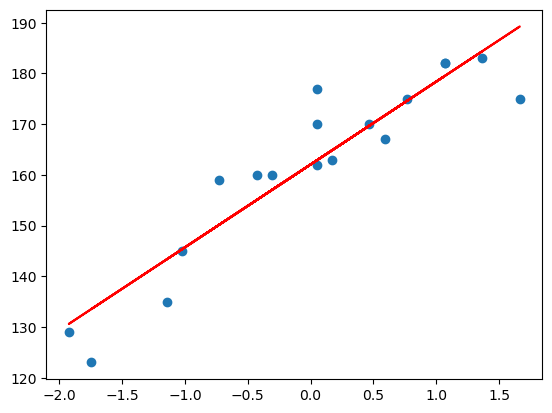

In [92]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

prediction of train data
predicted height output= intercept +coef_(Weights)
y_pred_train =157.5 + 17.03(X_train)
prediction of test data
predicted height output= intercept +coef_(Weights)
y_pred_test =157.5 + 17.03(X_test)

In [93]:
#Prediction test data

In [94]:
y_pred_test=regressor.predict(X_test)

In [95]:
y_pred_test

array([166.77985071, 135.50175868, 160.91520845, 130.6145568 ,
       141.36640094])

In [96]:
y_test

10    176
16    140
18    150
0     120
21    140
Name: Height, dtype: int64

In [ ]:
#Performance matrix MAE,MSE,RMSE


In [97]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [99]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mae)
print(mse)
print(rmse)

7.322911360303442
67.78459422294313
8.233139997773822


In [ ]:
##Accuracy of the model

R square
Formula

R^2 = 1 - SSR/SST

R^2 = Accuracy of the model
SSR = sum of squares of residuals
SST = total sum of squares

In [100]:
from sklearn.metrics import r2_score

In [101]:
score = r2_score(y_test,y_pred_test)


In [102]:
print(score)

0.7959278834810238


Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [108]:
1 - (1-score)*(len(y_test)-1)/(len(y_test)-(X_test.shape[1])-1)

0.727903844641365